In [2]:
from clickhouse_driver import Client
import pandas as pd

client = Client(host='localhost', database='metro')
query = "SELECT * FROM station"
data = client.execute(query)
df = pd.DataFrame(data, columns=['C/A', 'Unit', 'SCP', 'Station', 'Date', 'Time', 'Description', 'Entries', 'Exits', 'datetime','turnstile'])

# Преобразование столбца datetime в тип данных datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# Извлечение дополнительных признаков из datetime
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.dayofweek

# Вычисление количества входов и выходов за каждый интервал времени
df['entry_diff'] = df.groupby('turnstile')['Entries'].diff().fillna(0)
df['exit_diff'] = df.groupby('turnstile')['Exits'].diff().fillna(0)

# Удаление строк с отрицательными значениями entry_diff и exit_diff
df = df[(df['entry_diff'] >= 0) & (df['exit_diff'] >= 0)]

# Проверка данных
print(df.head())



    C/A  Unit       SCP Station        Date      Time Description   Entries  \
0  H007  R248  00-00-00    1 AV  2022-11-19  03:00:00     REGULAR  15874830   
1  H007  R248  00-00-01    1 AV  2022-11-19  03:00:00     REGULAR  61774939   
2  H007  R248  00-03-00    1 AV  2022-11-19  03:00:00     REGULAR      7462   
3  H007  R248  00-03-01    1 AV  2022-11-19  03:00:00     REGULAR   2665210   
4  H007  R248  00-03-02    1 AV  2022-11-19  03:00:00     REGULAR   6768676   

      Exits            datetime           turnstile  hour  day_of_week  \
0  19176597 2022-11-19 03:00:00  H007-R248-00-00-00     3            5   
1  39334861 2022-11-19 03:00:00  H007-R248-00-00-01     3            5   
2     42544 2022-11-19 03:00:00  H007-R248-00-03-00     3            5   
3   1254388 2022-11-19 03:00:00  H007-R248-00-03-01     3            5   
4    603401 2022-11-19 03:00:00  H007-R248-00-03-02     3            5   

   entry_diff  exit_diff  
0         0.0        0.0  
1         0.0        0.0  

In [4]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Подготовка данных для кластеризации
features = df[['hour', 'day_of_week', 'entry_diff', 'exit_diff']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(scaled_features)

# Иерархическая кластеризация
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(scaled_features)

# Добавление меток кластеров в данные
df['kmeans_cluster'] = kmeans_labels
df['dbscan_cluster'] = dbscan_labels
df['agg_cluster'] = agg_labels

# Оценка качества кластеризации
kmeans_silhouette = silhouette_score(scaled_features, kmeans_labels)
dbscan_silhouette = silhouette_score(scaled_features, dbscan_labels)
agg_silhouette = silhouette_score(scaled_features, agg_labels)

kmeans_db = davies_bouldin_score(scaled_features, kmeans_labels)
dbscan_db = davies_bouldin_score(scaled_features, dbscan_labels)
agg_db = davies_bouldin_score(scaled_features, agg_labels)

# Печать результатов
print(f"K-Means Silhouette Score: {kmeans_silhouette}, Davies-Bouldin Score: {kmeans_db}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}, Davies-Bouldin Score: {dbscan_db}")
print(f"Agglomerative Clustering Silhouette Score: {agg_silhouette}, Davies-Bouldin Score: {agg_db}")


MemoryError: 

In [5]:
# Подготовка данных для кластеризации
features = df[['hour', 'day_of_week', 'entry_diff', 'exit_diff']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [17]:
# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

print(df.head())

    C/A  Unit       SCP Station        Date      Time Description   Entries  \
0  H007  R248  00-00-00    1 AV  2022-11-19  03:00:00     REGULAR  15874830   
1  H007  R248  00-00-01    1 AV  2022-11-19  03:00:00     REGULAR  61774939   
2  H007  R248  00-03-00    1 AV  2022-11-19  03:00:00     REGULAR      7462   
3  H007  R248  00-03-01    1 AV  2022-11-19  03:00:00     REGULAR   2665210   
4  H007  R248  00-03-02    1 AV  2022-11-19  03:00:00     REGULAR   6768676   

      Exits            datetime           turnstile  hour  day_of_week  \
0  19176597 2022-11-19 03:00:00  H007-R248-00-00-00     3            5   
1  39334861 2022-11-19 03:00:00  H007-R248-00-00-01     3            5   
2     42544 2022-11-19 03:00:00  H007-R248-00-03-00     3            5   
3   1254388 2022-11-19 03:00:00  H007-R248-00-03-01     3            5   
4    603401 2022-11-19 03:00:00  H007-R248-00-03-02     3            5   

   entry_diff  exit_diff  kmeans_cluster  
0         0.0        0.0             

In [7]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(scaled_features)

MemoryError: 

In [8]:
# Иерархическая кластеризация
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(scaled_features)

MemoryError: Unable to allocate 425. TiB for an array with shape (58437341564370,) and data type float64

In [14]:
# Добавление меток кластеров в данные
df['kmeans_cluster'] = kmeans_labels
# df['dbscan_cluster'] = dbscan_labels
# df['agg_cluster'] = agg_labels
df.head()

,C/A,Unit,SCP,Station,Date,Time,Description,Entries,Exits,datetime,turnstile,hour,day_of_week,entry_diff,exit_diff,kmeans_cluster
0,H007,R248,00-00-00,1 AV,2022-11-19,03:00:00,REGULAR,15874830,19176597,2022-11-19 03:00:00,H007-R248-00-00-00,3,5,0.0,0.0,1
1,H007,R248,00-00-01,1 AV,2022-11-19,03:00:00,REGULAR,61774939,39334861,2022-11-19 03:00:00,H007-R248-00-00-01,3,5,0.0,0.0,1
2,H007,R248,00-03-00,1 AV,2022-11-19,03:00:00,REGULAR,7462,42544,2022-11-19 03:00:00,H007-R248-00-03-00,3,5,0.0,0.0,1
3,H007,R248,00-03-01,1 AV,2022-11-19,03:00:00,REGULAR,2665210,1254388,2022-11-19 03:00:00,H007-R248-00-03-01,3,5,0.0,0.0,1
4,H007,R248,00-03-02,1 AV,2022-11-19,03:00:00,REGULAR,6768676,603401,2022-11-19 03:00:00,H007-R248-00-03-02,3,5,0.0,0.0,1


In [9]:
# Оценка качества кластеризации
kmeans_silhouette = silhouette_score(scaled_features, kmeans_labels)
# dbscan_silhouette = silhouette_score(scaled_features, dbscan_labels)
# agg_silhouette = silhouette_score(scaled_features, agg_labels)

kmeans_db = davies_bouldin_score(scaled_features, kmeans_labels)
# dbscan_db = davies_bouldin_score(scaled_features, dbscan_labels)
# agg_db = davies_bouldin_score(scaled_features, agg_labels)

# Печать результатов
print(f"K-Means Silhouette Score: {kmeans_silhouette}, Davies-Bouldin Score: {kmeans_db}")
# print(f"DBSCAN Silhouette Score: {dbscan_silhouette}, Davies-Bouldin Score: {dbscan_db}")
# print(f"Agglomerative Clustering Silhouette Score: {agg_silhouette}, Davies-Bouldin Score: {agg_db}")

KeyboardInterrupt: 

C:\Users\Didcvee\PycharmProjects\pythonProject1\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


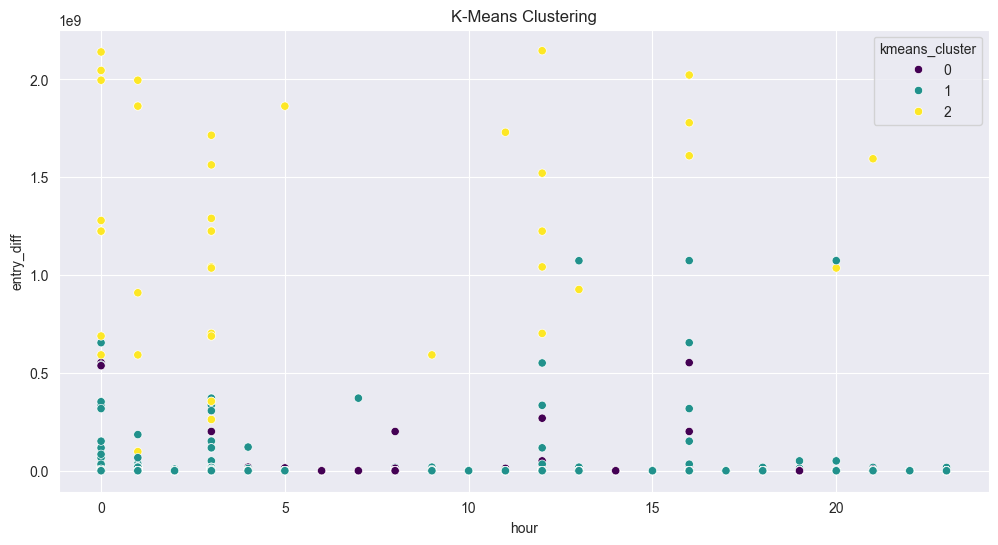

In [16]:
# Визуализация кластеров K-Means
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='hour', y='entry_diff', hue='kmeans_cluster', palette='viridis')
plt.title('K-Means Clustering')
plt.show()

# # Визуализация кластеров DBSCAN
# plt.figure(figsize=(12, 6))
# sns.scatterplot(data=data, x='hour', y='entry_diff', hue='dbscan_cluster', palette='viridis')
# plt.title('DBSCAN Clustering')
# plt.show()
# 
# # Визуализация кластеров иерархической кластеризации
# plt.figure(figsize=(12, 6))
# sns.scatterplot(data=data, x='hour', y='entry_diff', hue='agg_cluster', palette='viridis')
# plt.title('Agglomerative Clustering')
# plt.show()


In [ ]:
# Анализ кластеров K-Means
kmeans_analysis = data.groupby('kmeans_cluster')[['hour', 'day_of_week', 'entry_diff', 'exit_diff']].mean()
print(kmeans_analysis)

# Анализ кластеров DBSCAN
dbscan_analysis = data.groupby('dbscan_cluster')[['hour', 'day_of_week', 'entry_diff', 'exit_diff']].mean()
print(dbscan_analysis)

# Анализ кластеров иерархической кластеризации
agg_analysis = data.groupby('agg_cluster')[['hour', 'day_of_week', 'entry_diff', 'exit_diff']].mean()
print(agg_analysis)


In [ ]:
best_algorithm = 'K-Means' if kmeans_silhouette > max(dbscan_silhouette, agg_silhouette) else 'DBSCAN' if dbscan_silhouette > agg_silhouette else 'Agglomerative Clustering'

print(f"The best clustering algorithm is: {best_algorithm}")

In [18]:
clusters = df['kmeans_cluster'].unique()
dfs = {cluster: df[df['kmeans_cluster'] == cluster] for cluster in clusters}


C:\Users\Didcvee\PycharmProjects\pythonProject1\venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 166503574.58184093


KeyError: 'predicted_entries'

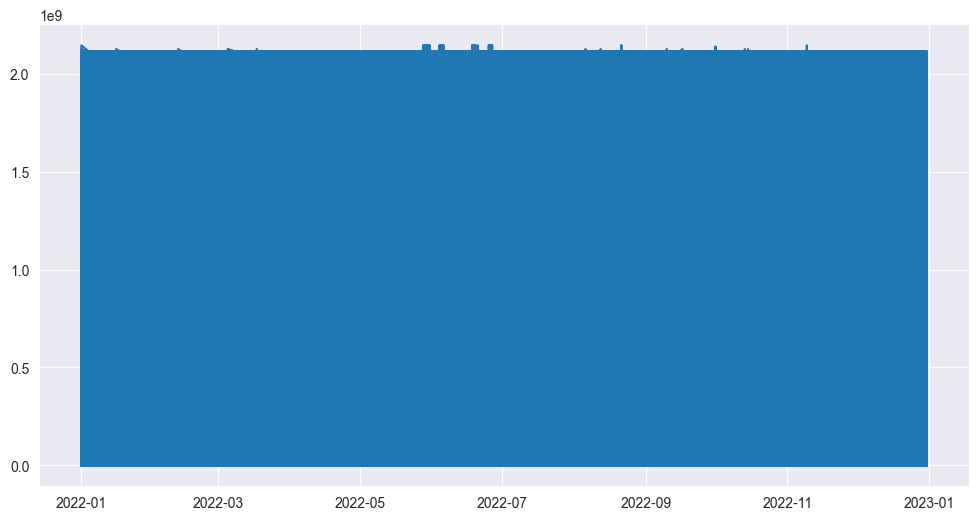

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Загрузка и подготовка данных (как описано выше)

# Разделение данных на признаки (X) и целевую переменную (y)
X = df[['hour', 'day_of_week', 'entry_diff', 'exit_diff', 'kmeans_cluster']]
y = df['Entries']  # Или 'Exits', в зависимости от того, что вы прогнозируете

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

# Создание данных для прогнозирования на 2 года вперед
future_dates = pd.date_range(start=df['datetime'].max(), periods=365*2, freq='D')
future_df = pd.DataFrame({'datetime': future_dates})
future_df['year'] = future_df['datetime'].dt.year
future_df['month'] = future_df['datetime'].dt.month
future_df['day'] = future_df['datetime'].dt.day
future_df['hour'] = future_df['datetime'].dt.hour


# Визуализация на 2 года вперед
plt.figure(figsize=(12, 6))

# Фактические данные (только для последнего года, чтобы было нагляднее)
last_year = df['datetime'].max() - pd.DateOffset(years=1)
plt.plot(df[df['datetime'] >= last_year]['datetime'], 
         df[df['datetime'] >= last_year]['Entries'], 
         label='Фактические данные (последний год)')

# Прогноз на 2 года вперед
plt.plot(future_df['datetime'], future_df['predicted_entries'], label='Прогноз (2 года)')

plt.xlabel('Дата')
plt.ylabel('Количество входов')
plt.title('Прогноз загруженности станции на 2 года')
plt.legend()
plt.xlim(last_year, future_df['datetime'].max())  # Ограничиваем ось X для наглядности
plt.show()


In [25]:
import pandas as pd
import numpy as np


# Создание дополнительных признаков
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['year'] = df['datetime'].dt.year
df['day_of_year'] = df['datetime'].dt.dayofyear
df['week_of_year'] = df['datetime'].dt.isocalendar().week

# Удаление строк с пропущенными значениями
df = df.dropna()

# Создание набора данных с разницей входов и выходов
df['entry_diff'] = df['Entries'].diff().fillna(0)
df['exit_diff'] = df['Exits'].diff().fillna(0)

# Обработка аномалий
df['entry_diff'] = np.where(df['entry_diff'] < 0, 0, df['entry_diff'])
df['exit_diff'] = np.where(df['exit_diff'] < 0, 0, df['exit_diff'])

# Группировка данных по кластеру и станции
clusters = df['kmeans_cluster'].unique()
stations = df['Station'].unique()

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error



# Создание набора данных с разницей входов и выходов
df['entry_diff'] = df['Entries'].diff().fillna(0)
df['exit_diff'] = df['Exits'].diff().fillna(0)

# Обработка аномалий
df['entry_diff'] = np.where(df['entry_diff'] < 0, 0, df['entry_diff'])
df['exit_diff'] = np.where(df['exit_diff'] < 0, 0, df['exit_diff'])

# Разделение данных на тренировочные и тестовые
X = df[['month', 'day', 'year', 'day_of_year', 'week_of_year', 'hour', 'day_of_week']]
y_entry = df['entry_diff']
y_exit = df['exit_diff']

X_train, X_test, y_entry_train, y_entry_test, y_exit_train, y_exit_test = train_test_split(
    X, y_entry, y_exit, test_size=0.2, random_state=42)

# Линейная регрессия
lr_model_entry = LinearRegression().fit(X_train, y_entry_train)
lr_model_exit = LinearRegression().fit(X_train, y_exit_train)

# Градиентный бустинг
gb_model_entry = GradientBoostingRegressor().fit(X_train, y_entry_train)
gb_model_exit = GradientBoostingRegressor().fit(X_train, y_exit_train)

# XGBoost
xgb_model_entry = xgb.XGBRegressor().fit(X_train, y_entry_train)
xgb_model_exit = xgb.XGBRegressor().fit(X_train, y_exit_train)

models = {
    'lr': (lr_model_entry, lr_model_exit),
    'gb': (gb_model_entry, gb_model_exit),
    'xgb': (xgb_model_entry, xgb_model_exit)
}



In [30]:
def evaluate_models(models, X_test, y_entry_test, y_exit_test):
    results = {}
    for name, (model_entry, model_exit) in models.items():
        entry_pred = model_entry.predict(X_test)
        exit_pred = model_exit.predict(X_test)
        
        entry_rmse = mean_squared_error(y_entry_test, entry_pred, squared=False)
        exit_rmse = mean_squared_error(y_exit_test, exit_pred, squared=False)
        
        results[name] = {'entry_rmse': entry_rmse, 'exit_rmse': exit_rmse}
        
    return results

evaluation_results = evaluate_models(models, X_test, y_entry_test, y_exit_test)
print(evaluation_results)


C:\Users\Didcvee\PycharmProjects\pythonProject1\venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Didcvee\PycharmProjects\pythonProject1\venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Didcvee\PycharmProjects\pythonProject1\venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Didcvee\PycharmProjects\pythonProject1\venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squa

{'lr': {'entry_rmse': 160269894.86272085, 'exit_rmse': 144181267.73014316}, 'gb': {'entry_rmse': 160265148.54842043, 'exit_rmse': 144179426.07983088}, 'xgb': {'entry_rmse': 160298604.9279701, 'exit_rmse': 144208710.50856462}}


C:\Users\Didcvee\PycharmProjects\pythonProject1\venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Didcvee\PycharmProjects\pythonProject1\venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [32]:
from datetime import timedelta

def forecast(models, start_date, periods, freq='H'):
    future_dates = pd.date_range(start_date, periods=periods, freq=freq)
    future_data = pd.DataFrame({
        'datetime': future_dates,
        'month': future_dates.month,
        'day': future_dates.day,
        'year': future_dates.year,
        'day_of_year': future_dates.dayofyear,
        'week_of_year': future_dates.isocalendar().week,
        'hour': future_dates.hour,
        'day_of_week': future_dates.dayofweek
    })
    
    entry_forecast = models['xgb'][0].predict(future_data)
    exit_forecast = models['xgb'][1].predict(future_data)
    
    return future_dates, entry_forecast, exit_forecast

start_date = '2024-06-01'
future_dates, entry_forecast, exit_forecast = forecast(models, start_date, periods=24*365*2)

# Построение графиков
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(future_dates, entry_forecast, label='Entries Forecast')
plt.plot(future_dates, exit_forecast, label='Exits Forecast')
plt.title('Forecasted Entries and Exits for the Next Two Years')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()


C:\Users\Didcvee\AppData\Local\Temp\ipykernel_1620\3580680612.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_dates = pd.date_range(start_date, periods=periods, freq=freq)


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:datetime: datetime64[ns]

C:\Users\Didcvee\AppData\Local\Temp\ipykernel_1620\3229387488.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_dates = pd.date_range(start_date, periods=periods, freq=freq)


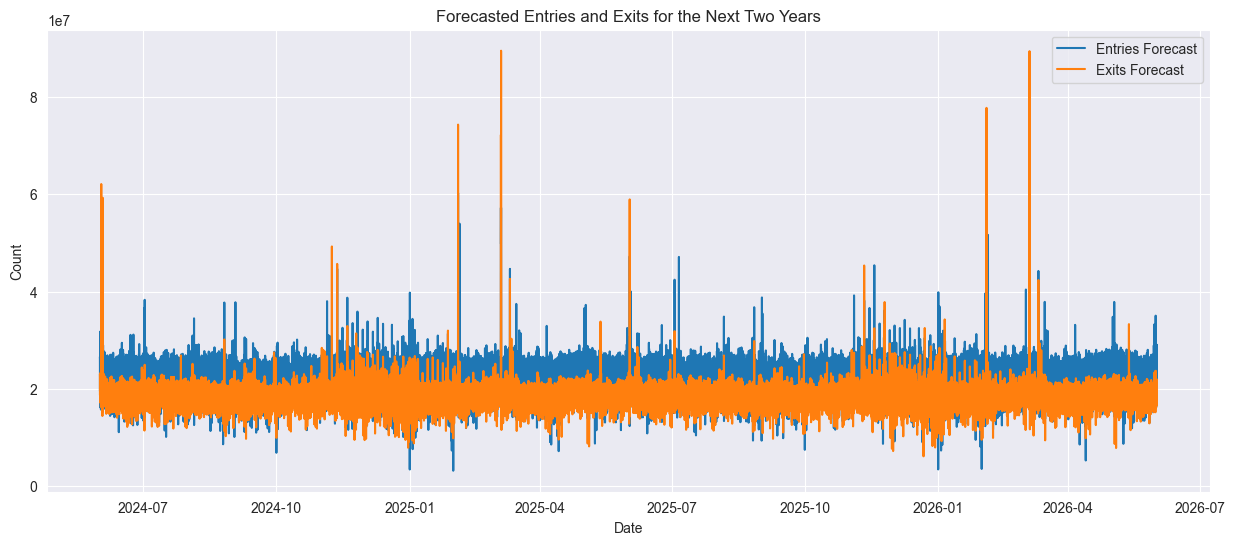

In [34]:
def forecast(models, start_date, periods, freq='H'):
    future_dates = pd.date_range(start_date, periods=periods, freq=freq)
    future_data = pd.DataFrame({
        'datetime': future_dates,
        'month': future_dates.month,
        'day': future_dates.day,
        'year': future_dates.year,
        'day_of_year': future_dates.dayofyear,
        'week_of_year': future_dates.isocalendar().week,
        'hour': future_dates.hour,
        'day_of_week': future_dates.dayofweek
    })
    
    # Удаление столбца datetime
    future_data = future_data.drop(columns=['datetime'])
    
    # Прогнозирование
    entry_forecast = models['xgb'][0].predict(future_data)
    exit_forecast = models['xgb'][1].predict(future_data)
    
    return future_dates, entry_forecast, exit_forecast

start_date = '2024-06-01'
future_dates, entry_forecast, exit_forecast = forecast(models, start_date, periods=24*365*2)

# Построение графиков
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(future_dates, entry_forecast, label='Entries Forecast')
plt.plot(future_dates, exit_forecast, label='Exits Forecast')
plt.title('Forecasted Entries and Exits for the Next Two Years')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()



In [45]:
!pip install gradio --upgrade
import joblib

# Сохранение моделей на диск
joblib.dump(lr_model_entry, 'models/lr_model_entry.pkl')
joblib.dump(lr_model_exit, 'models/lr_model_exit.pkl')
joblib.dump(gb_model_entry, 'models/gb_model_entry.pkl')
joblib.dump(gb_model_exit, 'models/gb_model_exit.pkl')
joblib.dump(xgb_model_entry, 'models/xgb_model_entry.pkl')
joblib.dump(xgb_model_exit, 'models/xgb_model_exit.pkl')




FileNotFoundError: [Errno 2] No such file or directory: 'models/lr_model_entry.pkl'

In [44]:
import gradio as gr
import pandas as pd
import numpy as np
from datetime import timedelta

# Функция для прогнозирования
def forecast(models, model_name, start_date, periods, freq='H'):
    future_dates = pd.date_range(start_date, periods=periods, freq=freq)
    future_data = pd.DataFrame({
        'datetime': future_dates,
        'month': future_dates.month,
        'day': future_dates.day,
        'year': future_dates.year,
        'day_of_year': future_dates.dayofyear,
        'week_of_year': future_dates.isocalendar().week,
        'hour': future_dates.hour,
        'day_of_week': future_dates.dayofweek
    })
    
    # Удаление столбца datetime
    future_data = future_data.drop(columns=['datetime'])
    
    # Прогнозирование
    entry_forecast = models[model_name][0].predict(future_data)
    exit_forecast = models[model_name][1].predict(future_data)
    
    return future_dates, entry_forecast, exit_forecast

# Функция для интерфейса
def predict(cluster, station, model_name, start_date, periods):
    filtered_data = data[(data['Cluster'] == cluster) & (data['Station'] == station)]
    future_dates, entry_forecast, exit_forecast = forecast(models, model_name, start_date, periods)
    
    forecast_df = pd.DataFrame({
        'Date': future_dates,
        'Entries': entry_forecast,
        'Exits': exit_forecast
    })
    
    return forecast_df

# Списки кластеров, станций и моделей
clusters = data['Cluster'].unique()
stations = data['Station'].unique()
model_names = ['lr', 'gb', 'xgb']

# Создание интерфейса Gradio
inputs = [
    gr.inputs.Dropdown(clusters, label="Select Cluster"),
    gr.inputs.Dropdown(stations, label="Select Station"),
    gr.inputs.Dropdown(model_names, label="Select Model"),
    gr.inputs.Date(label="Select Start Date", default="2024-06-01"),
    gr.inputs.Number(label="Select Period (hours)", default=24*365*2, step=1)
]

outputs = gr.outputs.Dataframe()

gr.Interface(fn=predict, inputs=inputs, outputs=outputs, title="Forecast of Subway Entries and Exits").launch(share=True)


TypeError: __init__() got an unexpected keyword argument 'socket_options'